In [1]:
import utils
utils.assign_free_gpus()
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import dataloaders
import torchvision
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)

No GPU available, using CPU


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset

In [2]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


In [3]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [4]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [5]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [6]:
model = create_model()
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])
dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)

Training epoch 0:   0%|          | 0/938 [00:00<?, ?it/s]

Training epoch 4: 100%|██████████| 938/938 [00:07<00:00, 125.07it/s]


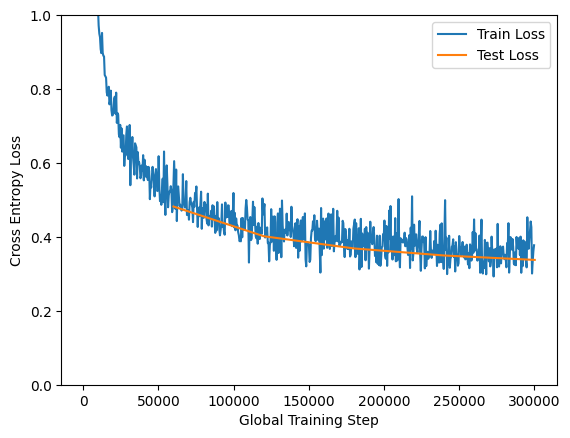

Final Test loss: 0.3377008881348713. Final Test accuracy: 0.9078


In [7]:
# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(test_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task A

In [8]:
modelA = create_model()
image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5)
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
optimizer = torch.optim.SGD(modelA.parameters(), lr=learning_rate)

trainer = Trainer(
  model=modelA,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_A, test_loss_dict_A = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:11<00:00, 78.49it/s]


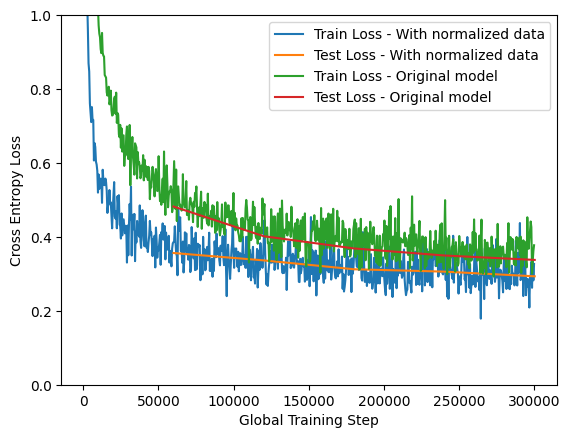

Final Test loss: 0.2933080054724672. Final Test accuracy: 0.9154


In [9]:
# Plot loss
utils.plot_loss(train_loss_dict_A, label="Train Loss - With normalized data")
utils.plot_loss(test_loss_dict_A, label="Test Loss - With normalized data")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")

plt.show()

final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, modelA, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task B

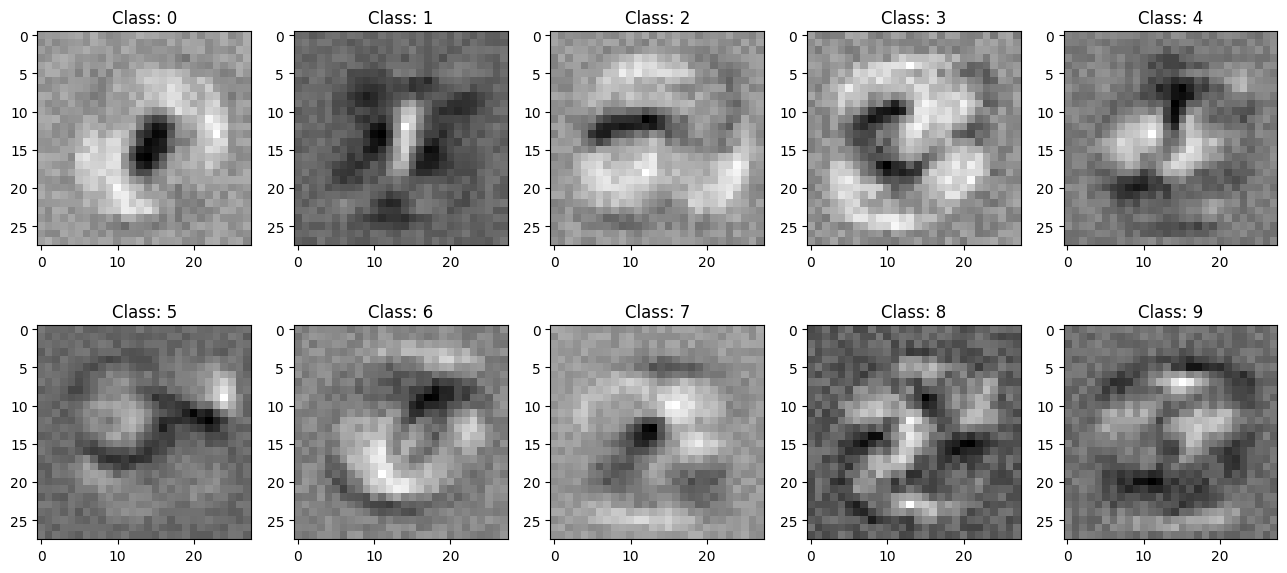

In [10]:
weight = list(modelA.children())[1].weight.cpu().data
weight.shape
fig = plt.figure(figsize=(16, 7))
for i,weight_x in enumerate(weight):
    weight_x = weight_x.reshape(28, 28)
    fig.add_subplot(2, 5,i+1)
    plt.title(f"Class: {i}")
    plt.imshow(weight_x, cmap='gray')

### Task C

In [11]:
modelC = create_model()
optimizer = torch.optim.SGD(modelC.parameters(), lr=1.0)
trainer = Trainer(
  model=modelC,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_C, test_loss_dict_C = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:13<00:00, 67.80it/s]


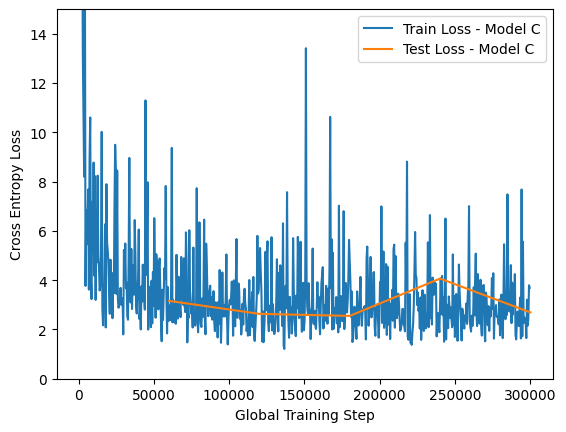

Final Test loss: 2.6928860044598917. Final Test accuracy: 0.8823


In [12]:
# Plot loss
utils.plot_loss(train_loss_dict_C, label="Train Loss - Model C")
utils.plot_loss(test_loss_dict_C, label="Test Loss - Model C")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 15])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")

plt.show()

final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, modelC, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task D

In [13]:
modelD = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
)
optimizer = torch.optim.SGD(modelD.parameters(), lr=learning_rate)
trainer = Trainer(
  model=modelD,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_D, test_loss_dict_D = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:14<00:00, 65.69it/s]


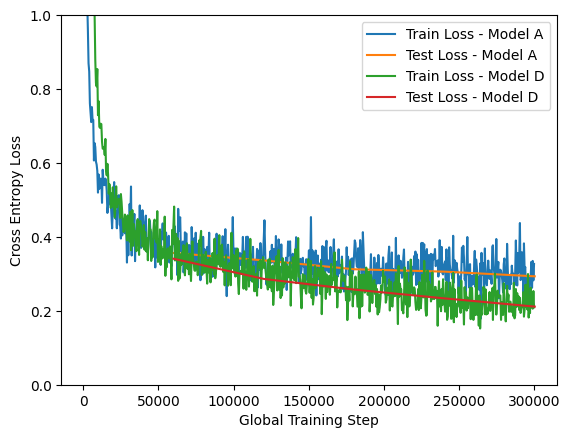

Final Test loss: 0.21138216619777261. Final Test accuracy: 0.9384


In [14]:
# Plot loss
utils.plot_loss(train_loss_dict_A, label="Train Loss - Model A")
utils.plot_loss(test_loss_dict_A, label="Test Loss - Model A")
utils.plot_loss(train_loss_dict_D, label="Train Loss - Model D")
utils.plot_loss(test_loss_dict_D, label="Test Loss - Model D")
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")

plt.show()

final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, modelD, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")